In [50]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import os

# Relatório de Análise Meteorológica: Bacias do Rio das Velhas

**1. Identificação e conhecimento da fonte primária:**

* A fonte primária de dados explorada neste relatório são as informações relacionadas à precipitação total mensal. Esses dados são provenientes das estações localizadas nas proximidades das bacias do Rio das Velhas, obtidos através do INMET.


**2. Proposta de Investigação:**
* Considerando a relevância crítica da água nas bacias do Rio das Velhas e a influência direta da precipitação nas condições hidrológicas, propomos uma investigação para analisar a relação entre as precipitações e as vazões nessa região.

**2. Variável Meteorológica Escolhida:**
* A variável escolhida para análise é a precipitação total mensal.

**4. Seleção de Estações:**
* Foram selecionadas dez estações próximas entre si ou contidas em uma mesma região delimitada. As estações escolhidas são: CONTAGEM, BELO HORIZONTE (PAMPULHA), DIAMANTINA, CURVELO, PIRAPORA, SETE LAGOAS, BELO HORIZONTE - CERCADINHO, JABOTICATUBAS, RIO-ACIMA, SANTA-LUZIA, E VESPASIANO.

**5. Período de Análise:**
A coleta, organização e filtragem dos dados foram realizadas para o período de 2018 a 2022.

In [51]:
def reader_one(file_path):
    header_start = 0
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if 'Latitude:' in line:
                latitude = float(line.split(':')[1].strip())
            elif 'Longitude:' in line:
                longitude = float(line.split(':')[1].strip())
            if 'Data Medicao;PRECIPITACAO TOTAL, MENSAL (AUT)(mm);' in line:
                header_start = i
                break
    
    df = pd.read_csv(file_path, delimiter=';', skiprows=header_start, usecols=['Data Medicao', 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'])
    df = df.rename(columns={'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)': 'valorMedida'})
    df = df.rename(columns={'Data Medicao': 'DataMedicao'})
    df['latitude'] = latitude
    df['longitude'] = longitude
    
    return df

def reader_two(file_path):    
    df = pd.read_csv(file_path)    
    df = df[['data', 'valorMedida', 'latitude', 'longitude']]
    df['data'] = pd.to_datetime(df['data'] + '-01')  # Adiciona '-01' para garantir o primeiro dia do mês
    df['data'] = df['data'] + pd.offsets.MonthEnd(0)  # Converte para o último dia do mês
    df = df.rename(columns={'data': 'DataMedicao'})

    return df

def filter_dates_station(station_data):
    for city, data in station_data.items():
        station_data[city]['DataMedicao'] = pd.to_datetime(station_data[city]['DataMedicao'], errors='coerce', format='%Y-%m-%d') 
        station_data[city] = station_data[city][station_data[city]['DataMedicao'].dt.year.between(2018, 2022)]
        if station_data[city].loc[:, 'valorMedida'].dtype != float:
            station_data[city].loc[:, 'valorMedida'] = ( station_data[city]['valorMedida'].str.replace(',', '.').astype(float))
    
    return station_data
    

In [52]:
data_paths = {0: 'dados/dados_A521_M_2006-10-09_2022-12-31.csv',              
              1: 'dados/dados_A537_M_2007-06-04_2022-12-31.csv',
              2: 'dados/dados_A538_M_2006-12-17_2022-12-31.csv',
              3: 'dados/dados_A545_M_2007-07-03_2022-12-31.csv',
              4: 'dados/dados_A569_M_2016-06-09_2022-12-31.csv',
              5: 'dados/dados_F501_M_2013-12-26_2022-12-31.csv',
              6: 'dados/jaboticatubas-centro.csv',
              7: 'dados/Rio-Acima-Morgans.csv',
              8: 'dados/Santa Luzia-Palmital.csv',
              9: 'dados/vespasiano-santaonies.csv'}
            
station = ['BH-PAMPULHA',
           'DIAMANTINA',
           'CURVELO',
           'PIRAPORA',
           'SETE-LAGOAS',
           'BH-CERCADINHO',
           'JABOTICATUBAS',
           'RIO-ACIMA',
           'SANTA-LUZIA',
           'VESPASIANO']


station_data = {}
for key, path in data_paths.items():
    if key < 6:
        station_data[station[key]] = reader_one(path)
    else:
        station_data[station[key]] = reader_two(path)


station_data = filter_dates_station(station_data)

**6. Importar os dados para tabelas geográficas, em que a localização da estação possa ser usada**


In [53]:
# No dataframe station_data temos a latitude e a longitude dos dados

def export_csv(station_data):
    path = 'tabelas_geograficas/'
    if not os.path.exists(path):
        os.makedirs(path)
    for city, df in station_data.items():
        file_name = f'{path}{city}.csv'
        df.to_csv(file_name, index=False)

export_csv(station_data)

**7. Análise e Hipótese: Investigação da Relação entre a Vazão do Rio das Velhas e a Intensidade de Precipitação Anual**

* Nossa hipótese central é que a vazão do Rio das Velhas está diretamente proporcional à intensidade anual de precipitação. A suposição é que anos com maiores índices de precipitação resultarão em vazões mais elevadas, enquanto anos de menor precipitação estarão associados a uma vazão reduzida.


In [54]:
# Importando dados de vazão do Rio das Velhas no período de 2018 a 2022

def reader_three(file_path):
    desired_columns = ['Ano', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
    df = pd.read_csv(file_path, delimiter=';')
    return df[desired_columns]



river_flow = reader_three('dados/vazao_mensal_rio_das_velhas.csv')
river_flow = river_flow[(river_flow['Ano']>= 2018) & (river_flow['Ano']<= 2022)]
river_flow

,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
47,2018,18.663,38.522,39.725,20.997,14.514,13.612,12.866,14.787,13.949,14.584,22.819,23.846
48,2019,19.864,21.797,17.460,23.921,17.652,13.438,12.269,10.313,9.983,11.281,21.241,25.095
49,2020,88.723,54.977,62.973,22.945,17.203,14.553,11.655,12.333,10.915,12.737,20.219,16.951
50,2021,16.845,31.918,23.019,15.746,12.581,11.320,10.957,10.317,10.371,20.628,33.306,32.312
51,2022,120.849,65.922,28.684,20.311,18.311,13.973,NaN,NaN,NaN,NaN,NaN,NaN


**8. Quantidade de dados válidos disponíveis em cada estação por coluna**

In [59]:
df_count = pd.DataFrame({city: df.count() for city, df in station_data.items()})
display(df_count)

,BH-PAMPULHA,DIAMANTINA,CURVELO,PIRAPORA,SETE-LAGOAS,BH-CERCADINHO,JABOTICATUBAS,RIO-ACIMA,SANTA-LUZIA,VESPASIANO
DataMedicao,60,60,60,60,60,60,58,58,58,57
valorMedida,59,52,51,56,50,59,58,58,58,57
latitude,60,60,60,60,60,60,58,58,58,57
longitude,60,60,60,60,60,60,58,58,58,57


**9. Reconstrução de um dicionário de dados para cada estação**

In [83]:
import pandas as pd

# Função para reconstruir o DataFrame de dados
def reconstruir_dataframe(df, cidade):
    dic_dados = {}

    for coluna in df.columns:
        dic_coluna = {}

        # Descrição da coluna
        if coluna == 'DataMedicao':
            dic_coluna['Descricao'] = f'A data da medição da precipitação refere-se ao último dia do mês, pois a medição representa a média mensal da precipitação diária.'
        elif coluna == 'valorMedida':
            dic_coluna['Descricao'] = f'Trata-se da medição da PRECIPITAÇÃO TOTAL MENSAL (AUT) em milímetros.'
        elif coluna == 'latitude':
            dic_coluna['Descricao'] = f'Representa a coordenada geográfica de latitude.'
        elif coluna == 'longitude':
            dic_coluna['Descricao'] = f'Representa a coordenada geográfica de longitude.'
        

        # Tipo de Dados
        tipo_dados = str(df[coluna].dtype)
        dic_coluna['Tipo de Dados'] = tipo_dados

        # Quantidade de Valores Únicos
        qtd_valores_unicos = df[coluna].nunique()
        dic_coluna['Quantidade de Valores Únicos'] = qtd_valores_unicos

        # Quantidade Total de Valores
        qtd_valores_totais = len(df[coluna])
        dic_coluna['Quantidade Total de Valores'] = qtd_valores_totais

        dic_dados[coluna] = dic_coluna

    # Remover a chave 'Cidade' do dicionário, pois ela não representa uma coluna no DataFrame
    dic_dados.pop('Cidade', None)

    # Criar DataFrame a partir do dicionário
    df_cidade = pd.DataFrame.from_dict(dic_dados, orient='index')

    return cidade, df_cidade

# Criar DataFrames para cada cidade
dataframes_cidades = {}

for cidade, df_cidade in station_data.items():
    cidade, df_cidade = reconstruir_dataframe(df_cidade, cidade)
    dataframes_cidades[cidade] = df_cidade

# Exibir os DataFrames
for cidade, df_cidade in dataframes_cidades.items():
    print(cidade)
    display(df_cidade)


BH-PAMPULHA


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],60,60
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,object,52,60
latitude,Representa a coordenada geográfica de latitude.,float64,1,60
longitude,Representa a coordenada geográfica de longitude.,float64,1,60


DIAMANTINA


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],60,60
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,object,48,60
latitude,Representa a coordenada geográfica de latitude.,float64,1,60
longitude,Representa a coordenada geográfica de longitude.,float64,1,60


CURVELO


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],60,60
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,object,42,60
latitude,Representa a coordenada geográfica de latitude.,float64,1,60
longitude,Representa a coordenada geográfica de longitude.,float64,1,60


PIRAPORA


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],60,60
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,object,39,60
latitude,Representa a coordenada geográfica de latitude.,float64,1,60
longitude,Representa a coordenada geográfica de longitude.,float64,1,60


SETE-LAGOAS


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],60,60
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,object,44,60
latitude,Representa a coordenada geográfica de latitude.,float64,1,60
longitude,Representa a coordenada geográfica de longitude.,float64,1,60


BH-CERCADINHO


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],60,60
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,object,55,60
latitude,Representa a coordenada geográfica de latitude.,float64,1,60
longitude,Representa a coordenada geográfica de longitude.,float64,1,60


JABOTICATUBAS


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],58,58
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,float64,51,58
latitude,Representa a coordenada geográfica de latitude.,float64,1,58
longitude,Representa a coordenada geográfica de longitude.,float64,1,58


RIO-ACIMA


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],58,58
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,float64,54,58
latitude,Representa a coordenada geográfica de latitude.,float64,1,58
longitude,Representa a coordenada geográfica de longitude.,float64,1,58


SANTA-LUZIA


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],58,58
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,float64,52,58
latitude,Representa a coordenada geográfica de latitude.,float64,2,58
longitude,Representa a coordenada geográfica de longitude.,float64,2,58


VESPASIANO


,Descricao,Tipo de Dados,Quantidade de Valores Únicos,Quantidade Total de Valores
DataMedicao,A data da medição da precipitação refere-se ao...,datetime64[ns],57,57
valorMedida,Trata-se da medição da PRECIPITAÇÃO TOTAL MENS...,float64,51,57
latitude,Representa a coordenada geográfica de latitude.,float64,1,57
longitude,Representa a coordenada geográfica de longitude.,float64,1,57


**Plot**

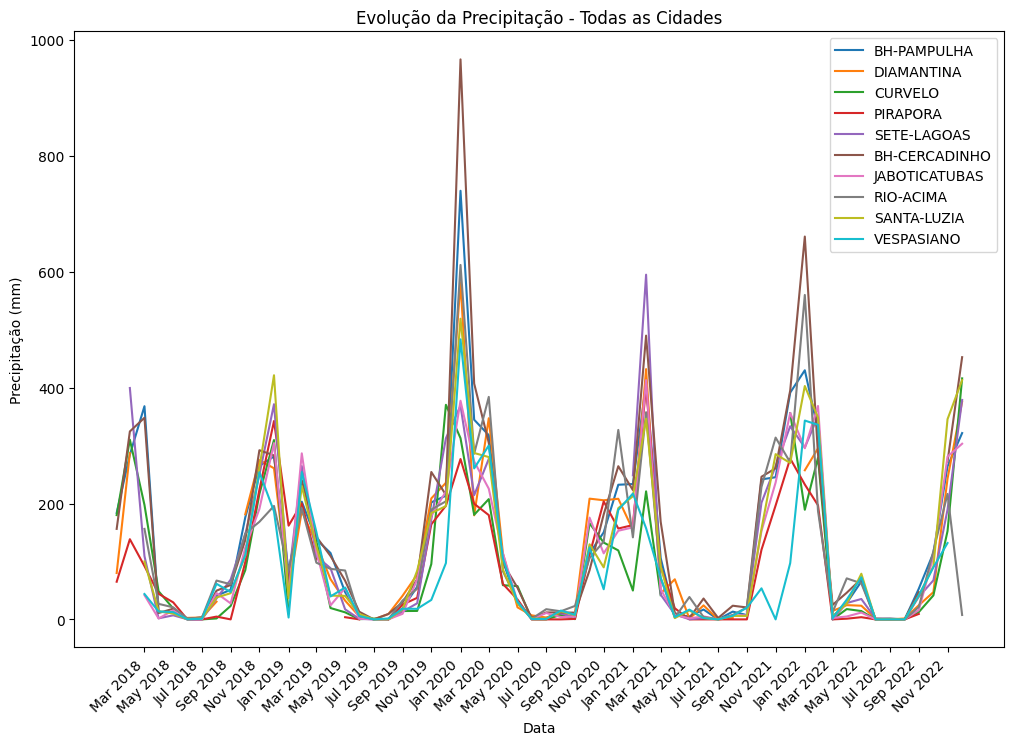

In [84]:
def plot_stations(station_data):    
    plt.figure(figsize=(12, 8))
    for cidade, df in station_data.items():                
        plt.plot(df['DataMedicao'], df['valorMedida'], label=cidade)
    
    plt.title('Evolução da Precipitação - Todas as Cidades')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()     
    plt.xticks(df['DataMedicao'][::2], df['DataMedicao'][::2].dt.strftime('%b %Y'), rotation=45, ha='right')
    plt.show()


plot_stations(station_data)